<a href="https://colab.research.google.com/github/jtviegas-sandbox/datascience/blob/main/notebooks/findata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# init

In [1]:
import importlib 
import os
COLAB_MODE = importlib.find_loader('google') is not None
print(f"colab mode? {COLAB_MODE}")    

colab mode? False


/var/folders/zk/bv3cdg6n4sx8b4sw62hm2qww0000gp/T/ipykernel_14675/4122734260.py:3: DeprecationWarning: Deprecated since Python 3.4. Use importlib.util.find_spec() instead.
  COLAB_MODE = importlib.find_loader('google') is not None


In [2]:
import json

if COLAB_MODE:
    # take from requirements.txt
    !pip install fredapi pandas_datareader ipykernel
    from google.colab import userdata
    FRED_KEY=userdata.get('FRED_KEY')
    NASDAQ_KEY=userdata.get('NASDAQ_KEY')
else: 
    # use requirements.txt
    with open('../.secrets.json') as f:
        secrets = json.load(f)
        FRED_KEY = secrets["FRED_KEY"]
        NASDAQ_KEY = secrets["NASDAQ_KEY"]

In [3]:
from fredapi import Fred
import pandas_datareader as pdr
import pandas_datareader.data as web
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nasdaqdatalink
import ffn
import yfinance as yf
from pandas.plotting import scatter_matrix
import mplfinance as mfp
import talib

%matplotlib inline

/Users/jtgv/Documents/code/jtviegas/datascience/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
fred = Fred(api_key=FRED_KEY)
nasdaqdatalink.ApiConfig.api_key = NASDAQ_KEY

# metrics

In [5]:
start = datetime(2020,1,1)
end = datetime(2023,12,31)
MARKET_DAYS_IN_YEAR = 252

## cpi

In [6]:
cpi_us = fred.get_series("CPALTT01USM657N")     
cpi_us

1955-02-01         NaN
1955-03-01         NaN
1955-04-01         NaN
1955-05-01         NaN
1955-06-01         NaN
                ...   
2023-08-01    0.436716
2023-09-01    0.248513
2023-10-01   -0.038338
2023-11-01   -0.201514
2023-12-01   -0.099332
Length: 827, dtype: float64

In [7]:
# another way of doing it
cpi_us = pdr.DataReader("CPALTT01USM657N", "fred", start, end).rename(columns={"CPALTT01USM657N": "CPI"})
cpi_us


,CPI
DATE,
2020-01-01,0.387977
2020-02-01,0.274062
2020-03-01,-0.217645
2020-04-01,-0.668694
2020-05-01,0.001950
2020-06-01,0.547205
2020-07-01,0.505824
2020-08-01,0.315321
2020-09-01,0.139275


## gdp

In [8]:
nom_gdp = pdr.DataReader("GDP", "fred", start, end)
nom_gdp

,GDP
DATE,
2020-01-01,21706.513
2020-04-01,19913.143
2020-07-01,21647.640
2020-10-01,22024.502
2021-01-01,22600.185
2021-04-01,23292.362
2021-07-01,23828.973
2021-10-01,24654.603
2022-01-01,25029.116


In [9]:
real_gdp = pdr.DataReader("GDPC1", "fred", start, end)
real_gdp

,GDPC1
DATE,
2020-01-01,20665.553
2020-04-01,19034.830
2020-07-01,20511.785
2020-10-01,20724.128
2021-01-01,20990.541
2021-04-01,21309.544
2021-07-01,21483.083
2021-10-01,21847.602
2022-01-01,21738.871


In [10]:
real_gdp_change = real_gdp.pct_change()*100
real_gdp_change

,GDPC1
DATE,
2020-01-01,NaN
2020-04-01,-7.891020
2020-07-01,7.759223
2020-10-01,1.035224
2021-01-01,1.285521
2021-04-01,1.519746
2021-07-01,0.814372
2021-10-01,1.696772
2022-01-01,-0.497679


# stock market data

In [11]:
#ffn.get("tsla", start=start.strftime("%Y-%m-%d"), end=end.strftime("%Y-%m-%d"))

In [72]:
from typing import List

__DEFAULT_INTERVAL: str = "1d"

def __market_data_as_point(market_data, symbols: List[str]) -> pd.DataFrame:

    result = pd.DataFrame(columns=["symbol", "variable", "value", "actual_time"])
    df_as_dict = {"symbol": [], "variable": [], "value": [], "actual_time": []}
    if not market_data.empty:
        multiple_symbols: bool = 1 < len(symbols)
        for key, val in market_data.to_dict().items():
            if multiple_symbols:
                variable, symbol = key
            else:
                variable = key
                symbol = symbols[0]

            for ts, num in val.items():
                if not pd.isnull(num):
                    (df_as_dict["symbol"]).append(symbol)
                    (df_as_dict["variable"]).append(variable)
                    (df_as_dict["value"]).append(num)
                    (df_as_dict["actual_time"]).append(ts.timestamp())

        result = pd.DataFrame.from_dict(df_as_dict)

    return result

def __market_data_as_row(market_data, symbols: List[str]) -> pd.DataFrame:
    df = __market_data_as_point(market_data, symbols)
    df = df.pivot(index=["actual_time", "symbol"], columns='variable', values='value')
    df.columns.name = None
    return df

def get_ticker(key: str, start: datetime=None, end: datetime=None, as_data_point: bool=False, **kwargs) -> pd.DataFrame:

        symbols_as_str = key
        symbols: List[str] = [k.strip() for k in symbols_as_str.split(",")]

        interval = __DEFAULT_INTERVAL
        if "interval" in kwargs:
            interval = kwargs["interval"]

        market_data = yf.download(symbols_as_str, start=start, end=end, interval=interval)
        if as_data_point:
            result = __market_data_as_point(market_data, symbols)
            result.reset_index(drop=True, inplace=True)
        else:
            result = __market_data_as_row(market_data, symbols)
            result.reset_index(drop=False, inplace=True)
        
        result = result.sort_values(by=["actual_time", "symbol"]).rename(columns={"Adj Close": "adj_close", "Close": "close", "High": "high", "Low": "low", "Open": "open", "Volume": "volume"})

        return result

def get_maket_cap(ticker: str) -> float:
    return yf.Ticker(ticker).info["marketCap"]

# analysis

In [13]:
df_amd = get_ticker("AMD", start=start, end=end)
df_amd['ts'] = pd.to_datetime(df_amd['actual_time'],unit='s')
df_amd.set_index("ts", inplace=True)
df_amd["returns"] = df_amd["adj_close"].pct_change()

df_nvda = get_ticker("NVDA", start=start, end=end)
df_nvda['ts'] = pd.to_datetime(df_nvda['actual_time'],unit='s')
df_nvda.set_index("ts", inplace=True)
df_nvda["returns"] = df_nvda["adj_close"].pct_change()

df_sp500 = get_ticker("^GSPC", start=start, end=end)
df_sp500['ts'] = pd.to_datetime(df_sp500['actual_time'],unit='s')
df_sp500.set_index("ts", inplace=True)
df_sp500["returns"] = df_sp500["adj_close"].pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## line and volume chart

<Axes: title={'center': 'adj_close'}, xlabel='ts'>

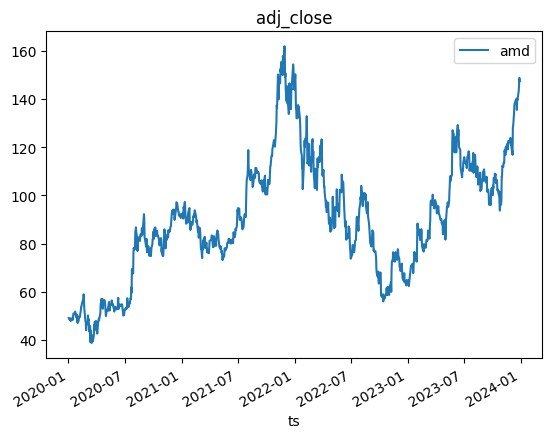

In [14]:
df_amd.plot(y="adj_close", label="amd", title="adj_close")

<Axes: title={'center': 'volume traded'}, xlabel='ts'>

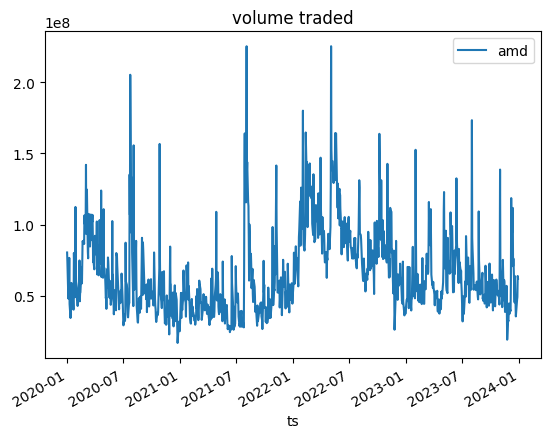

In [15]:
df_amd.plot(y="volume", label="amd", title="volume traded")

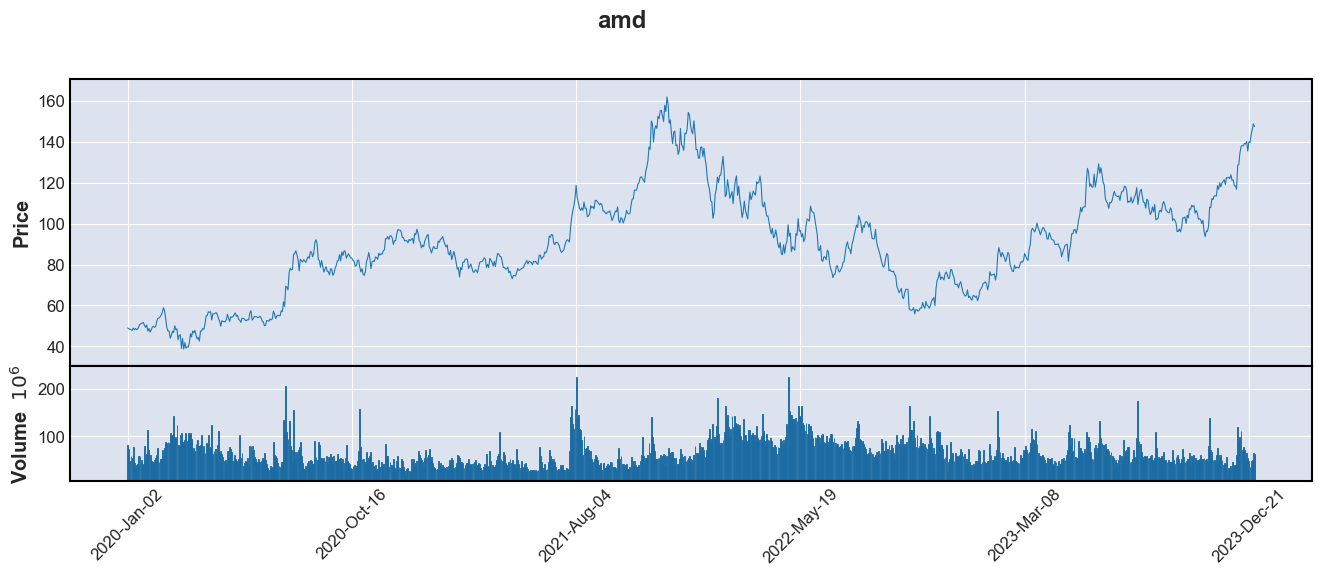

In [16]:
mfp.plot(df_amd, type="line", title="amd", figratio=(60,20), volume=True)

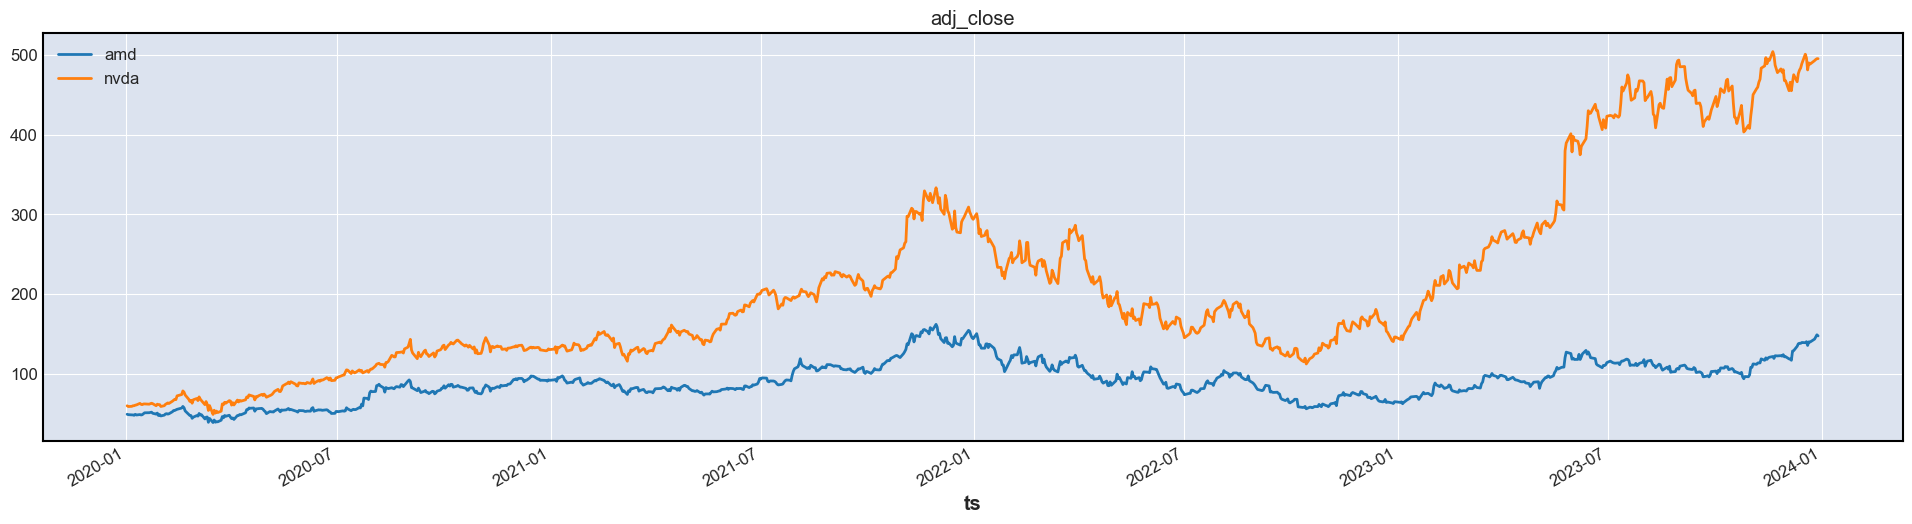

In [17]:

df_amd["adj_close"].plot(label="amd", title="adj_close", figsize=(24,6))
df_nvda["adj_close"].plot(label="nvda")
plt.legend()

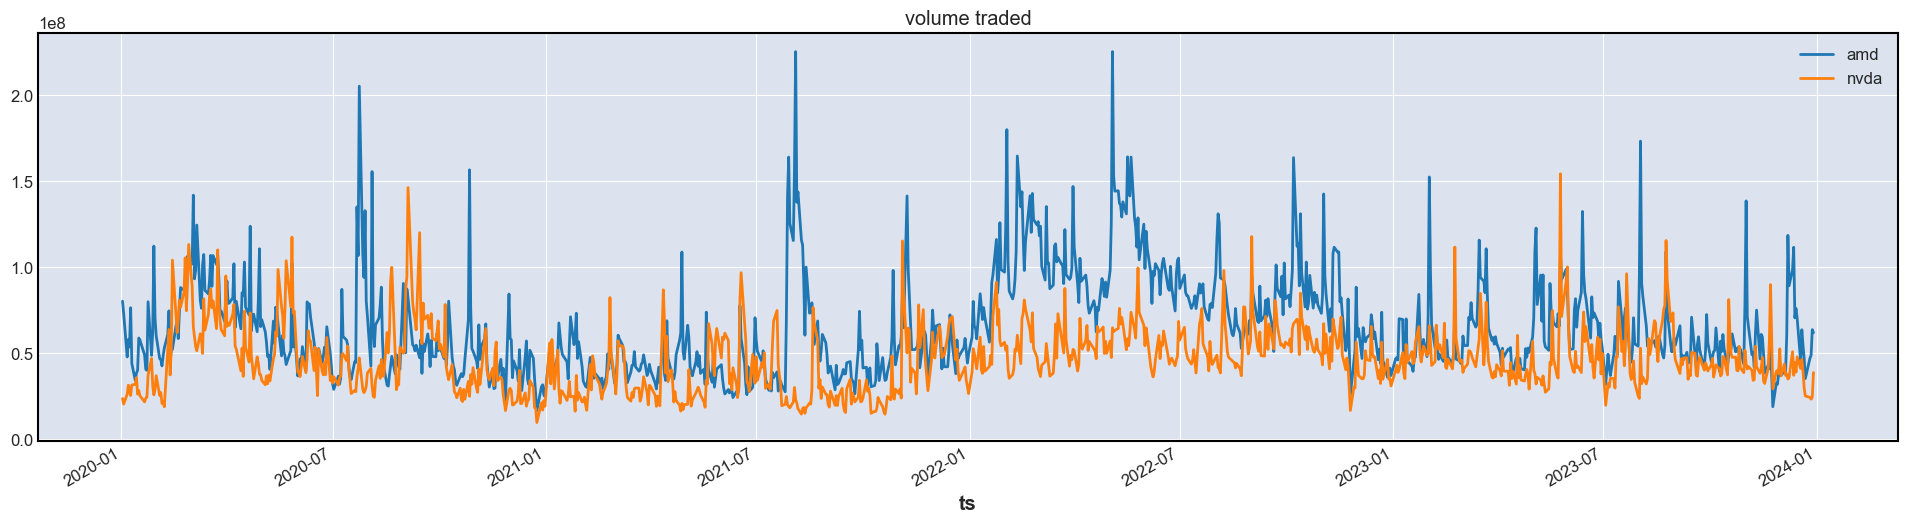

In [18]:
df_amd["volume"].plot(label="amd", title="volume traded", figsize=(24,6))
df_nvda["volume"].plot(label="nvda")
plt.legend()

## candlesticks

[*********************100%%**********************]  1 of 1 completed


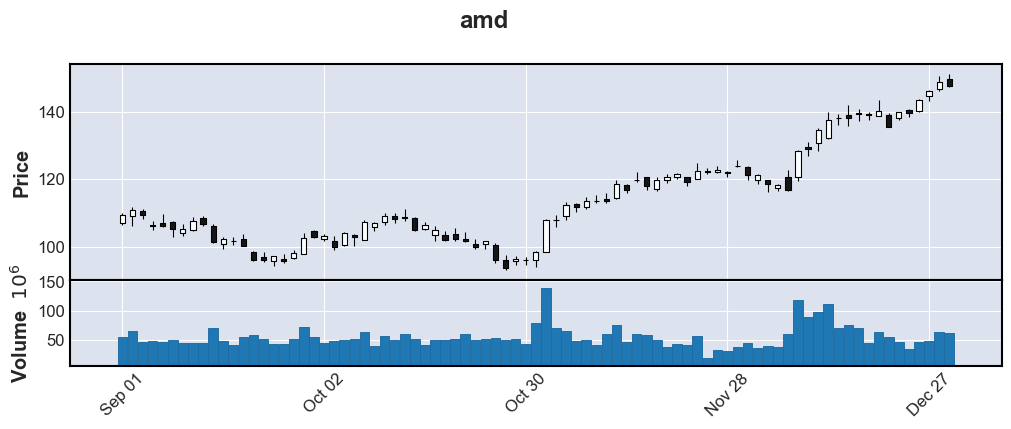

In [19]:
df = get_ticker("AMD", start=datetime(2023,9,1), end=datetime(2023,12,31))
df['ts'] = pd.to_datetime(df['actual_time'],unit='s')
df.set_index("ts", inplace=True)

mfp.plot(df, type="candle", title="amd", figratio=(60,20), volume=True, figscale=0.75)


## histograms

In [20]:
df = get_ticker("AMD", start=start, end=end)
df_returns = df["adj_close"].pct_change()

[*********************100%%**********************]  1 of 1 completed


<Axes: >

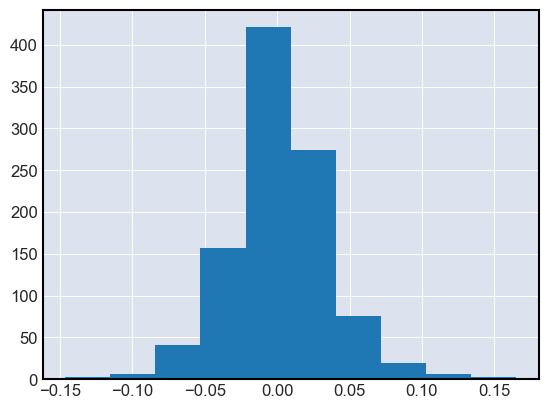

In [21]:
n_bins = 1 + 3.3222 * np.log10(df_returns.size)
df_returns.hist(bins= int(n_bins))

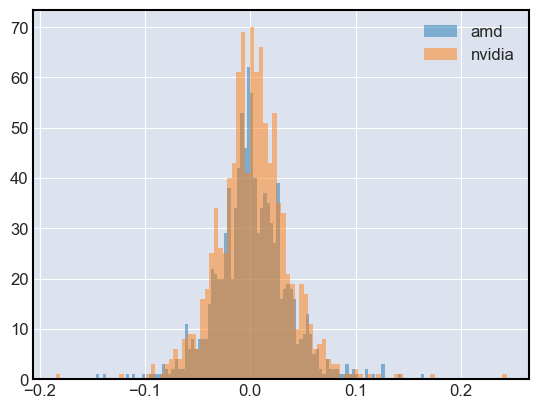

In [22]:
df_amd["returns"].hist(bins= 100, label="amd", alpha=0.5)
df_nvda["returns"].hist(bins= 100, label="nvidia", alpha=0.5)
plt.legend()

## scatter plots

In [23]:
df_t = get_ticker("TSLA,AAPL", start=start, end=end)
df_t

[*********************100%%**********************]  2 of 2 completed


,actual_time,symbol,adj_close,close,high,low,open,volume
0,1.577923e+09,AAPL,73.152664,75.087502,75.150002,73.797501,74.059998,135480400.0
1,1.577923e+09,TSLA,28.684000,28.684000,28.713333,28.114000,28.299999,142981500.0
2,1.578010e+09,AAPL,72.441460,74.357498,75.144997,74.125000,74.287498,146322800.0
3,1.578010e+09,TSLA,29.534000,29.534000,30.266666,29.128000,29.366667,266677500.0
4,1.578269e+09,AAPL,73.018684,74.949997,74.989998,73.187500,73.447502,118387200.0
...,...,...,...,...,...,...,...,...
2007,1.703635e+09,TSLA,261.440002,261.440002,263.339996,257.519989,258.350006,106494400.0
2008,1.703722e+09,AAPL,193.580002,193.580002,194.660004,193.169998,194.139999,34049900.0
2009,1.703722e+09,TSLA,253.179993,253.179993,265.130005,252.710007,263.660004,113619900.0
2010,1.703808e+09,AAPL,192.529999,192.529999,194.399994,191.729996,193.899994,42628800.0


array([[<Axes: xlabel='adj_close', ylabel='adj_close'>,
        <Axes: xlabel='volume', ylabel='adj_close'>],
       [<Axes: xlabel='adj_close', ylabel='volume'>,
        <Axes: xlabel='volume', ylabel='volume'>]], dtype=object)

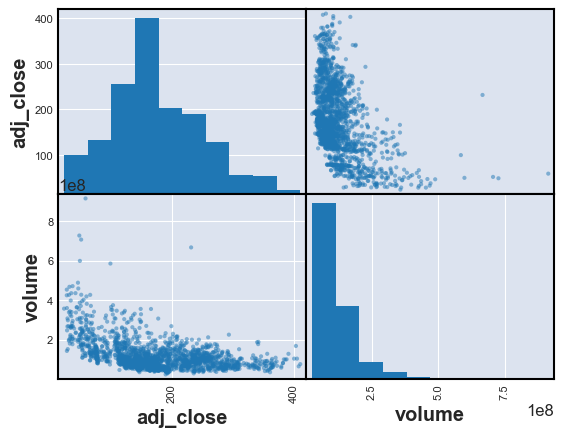

In [24]:
scatter_matrix(df_t[["adj_close", "volume"]])

<Axes: xlabel='volume', ylabel='adj_close'>

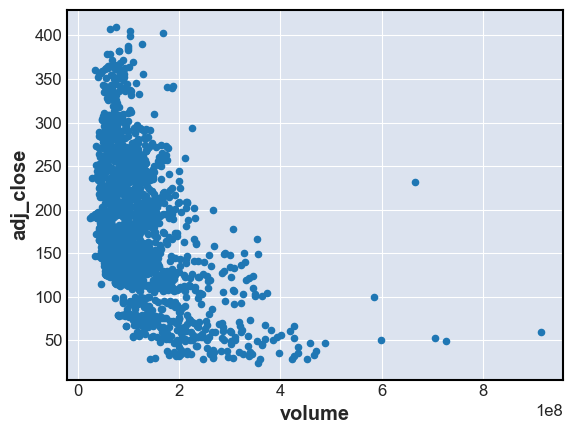

In [25]:
df_t.plot(kind="scatter", x="volume", y="adj_close")

## boxplot

Text(0.5, 1.0, 'boxplot')

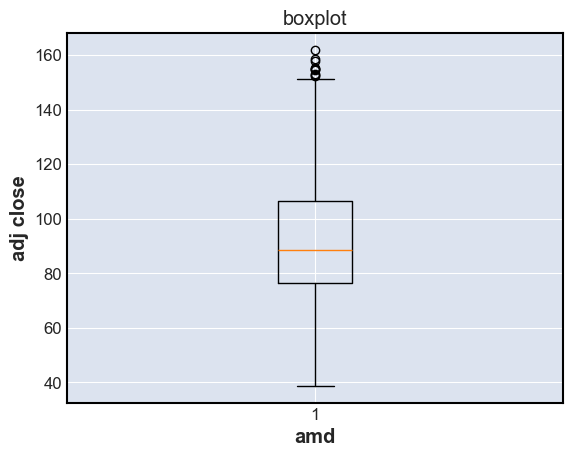

In [26]:
plt.boxplot(df_amd["adj_close"])
plt.ylabel("adj close")
plt.xlabel("amd")
plt.title("boxplot")

<Axes: >

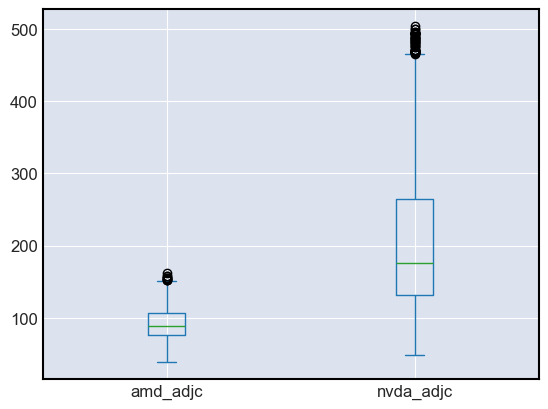

In [27]:
df_both = pd.concat([df_amd["adj_close"], df_nvda["adj_close"]], axis=1)
df_both.columns = ["amd_adjc", "nvda_adjc"]
df_both.plot(kind="box")


## kernel density estimation

<Axes: ylabel='Density'>

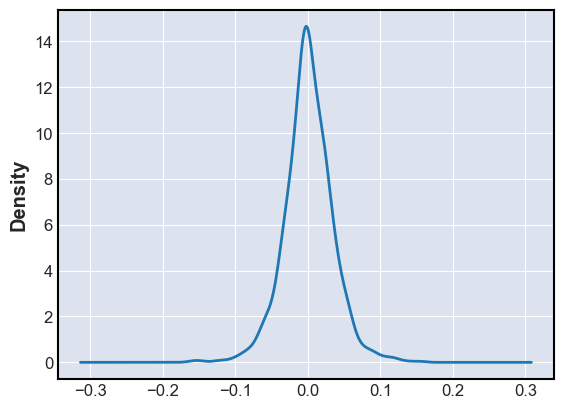

In [28]:
df_amd_log_returns = np.log(df_amd["adj_close"]/df_amd["adj_close"].shift(1))
df_amd_log_returns.plot(kind="kde", bw_method="scott")

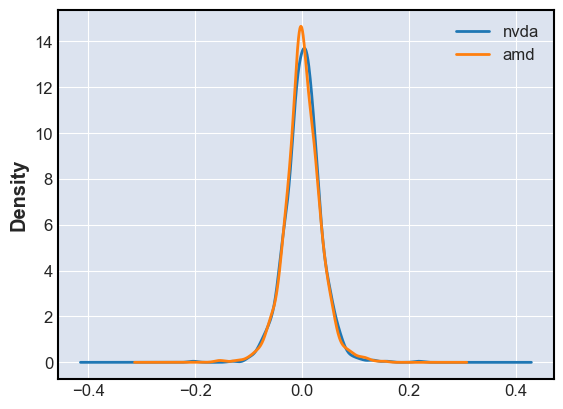

In [29]:
df_nvda_log_returns = np.log(df_nvda["adj_close"]/df_nvda["adj_close"].shift(1))
df_nvda_log_returns.plot(kind="kde", bw_method="scott", label="nvda")
df_amd_log_returns.plot(kind="kde", bw_method="scott", label="amd")
plt.legend()

## correlation and covariance

In [30]:
df_both = pd.concat([df_amd["returns"], df_sp500["returns"]], axis=1).dropna()
df_both.columns = ["amd", "sp500"]
df_both

,amd,sp500
ts,,
2020-01-03,-0.010183,-0.007060
2020-01-06,-0.004321,0.003533
2020-01-07,-0.002893,-0.002803
2020-01-08,-0.008705,0.004902
2020-01-09,0.023834,0.006655
...,...,...
2023-12-22,-0.002216,0.001660
2023-12-26,0.027292,0.004232
2023-12-27,0.018548,0.001430


### covariance matrix

In [31]:
df_both.cov()

,amd,sp500
amd,0.001138,0.000318
sp500,0.000318,0.000210


### annualized covariance matrix

In [32]:
df_both.cov() * MARKET_DAYS_IN_YEAR

,amd,sp500
amd,0.286765,0.080130
sp500,0.080130,0.052962


### correlation

In [33]:
df_both.corr()

,amd,sp500
amd,1.000000,0.650209
sp500,0.650209,1.000000


### correlation heatmap

<module 'matplotlib.pyplot' from '/Users/jtgv/Documents/code/jtviegas/datascience/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

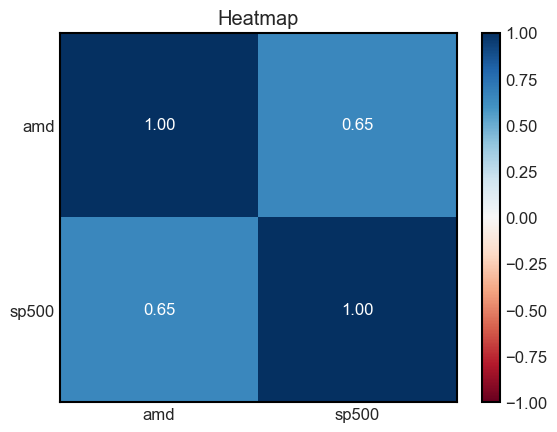

In [34]:
df_both.plot_corr_heatmap()

## moving averages

In [35]:
df_amd["ma50"] = df_amd["adj_close"].rolling(50).mean()
df_nvda["ma50"] = df_nvda["adj_close"].rolling(50).mean()
df_amd["ma100"] = df_amd["adj_close"].rolling(100).mean()
df_nvda["ma100"] = df_nvda["adj_close"].rolling(100).mean()
df_amd["ma200"] = df_amd["adj_close"].rolling(200).mean()
df_nvda["ma200"] = df_nvda["adj_close"].rolling(200).mean()

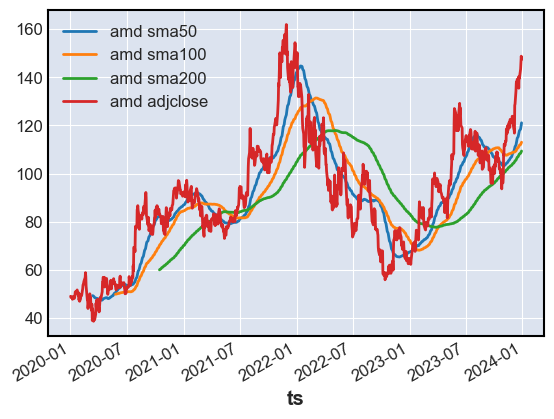

In [36]:
df_amd["ma50"].plot(label="amd sma50")
df_amd["ma100"].plot(label="amd sma100")
df_amd["ma200"].plot(label="amd sma200")
df_amd["adj_close"].plot(label="amd adjclose")
plt.legend()

In [37]:
df_amd["ema50"] = df_amd["adj_close"].ewm(span=50, adjust=False).mean()
df_nvda["ema50"] = df_nvda["adj_close"].ewm(span=50, adjust=False).mean()
df_amd["ema100"] = df_amd["adj_close"].ewm(span=100, adjust=False).mean()
df_nvda["ema100"] = df_nvda["adj_close"].ewm(span=100, adjust=False).mean()
df_amd["ema200"] = df_amd["adj_close"].ewm(span=200, adjust=False).mean()
df_nvda["ema200"] = df_nvda["adj_close"].ewm(span=200, adjust=False).mean()

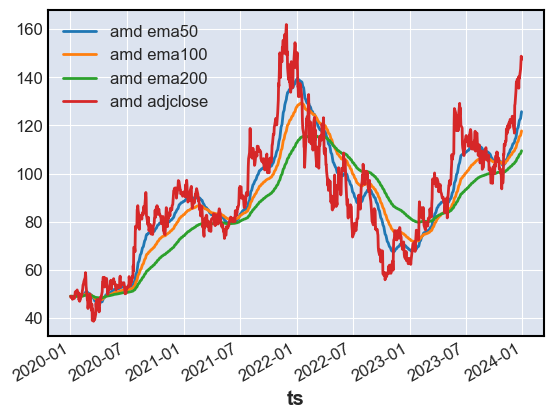

In [38]:
df_amd["ema50"].plot(label="amd ema50")
df_amd["ema100"].plot(label="amd ema100")
df_amd["ema200"].plot(label="amd ema200")
df_amd["adj_close"].plot(label="amd adjclose")
plt.legend()

## moving average convergence divergence (MACD) with baseline and signal

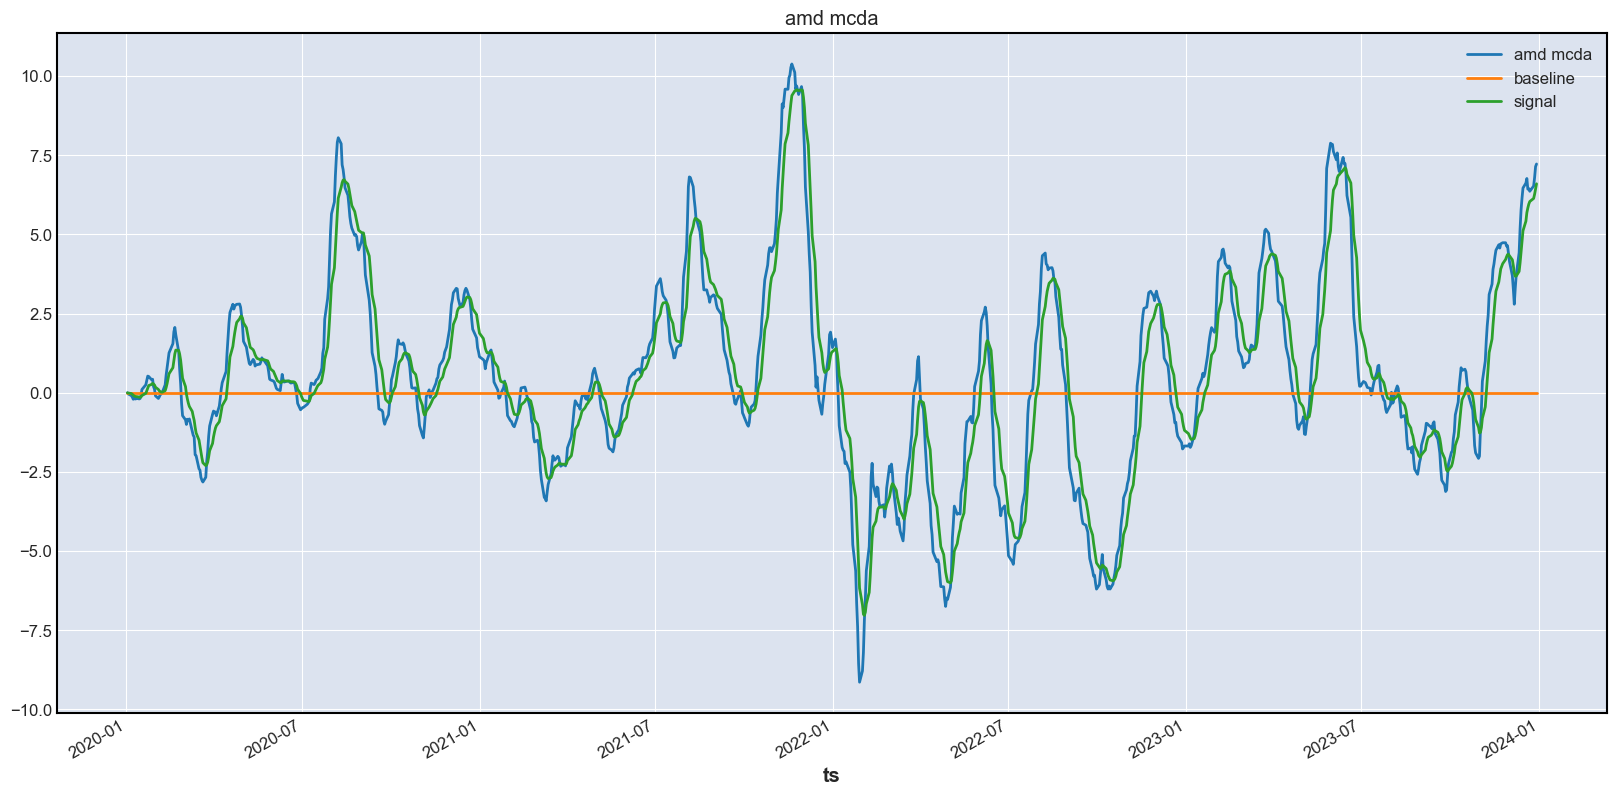

In [39]:
df_amd["macd"] = df_amd["adj_close"].ewm(span=12, adjust=False).mean()-df_amd["adj_close"].ewm(span=26, adjust=False).mean()
df_amd["baseline"] = 0
df_amd["signal"] = df_amd["macd"].ewm(span=9, adjust=False).mean()
df_amd["macd"].plot(label="amd mcda", figsize=(20,10))
df_amd["baseline"].plot(label="baseline")
df_amd["signal"].plot(label="signal")

plt.title("amd mcda")
plt.legend()


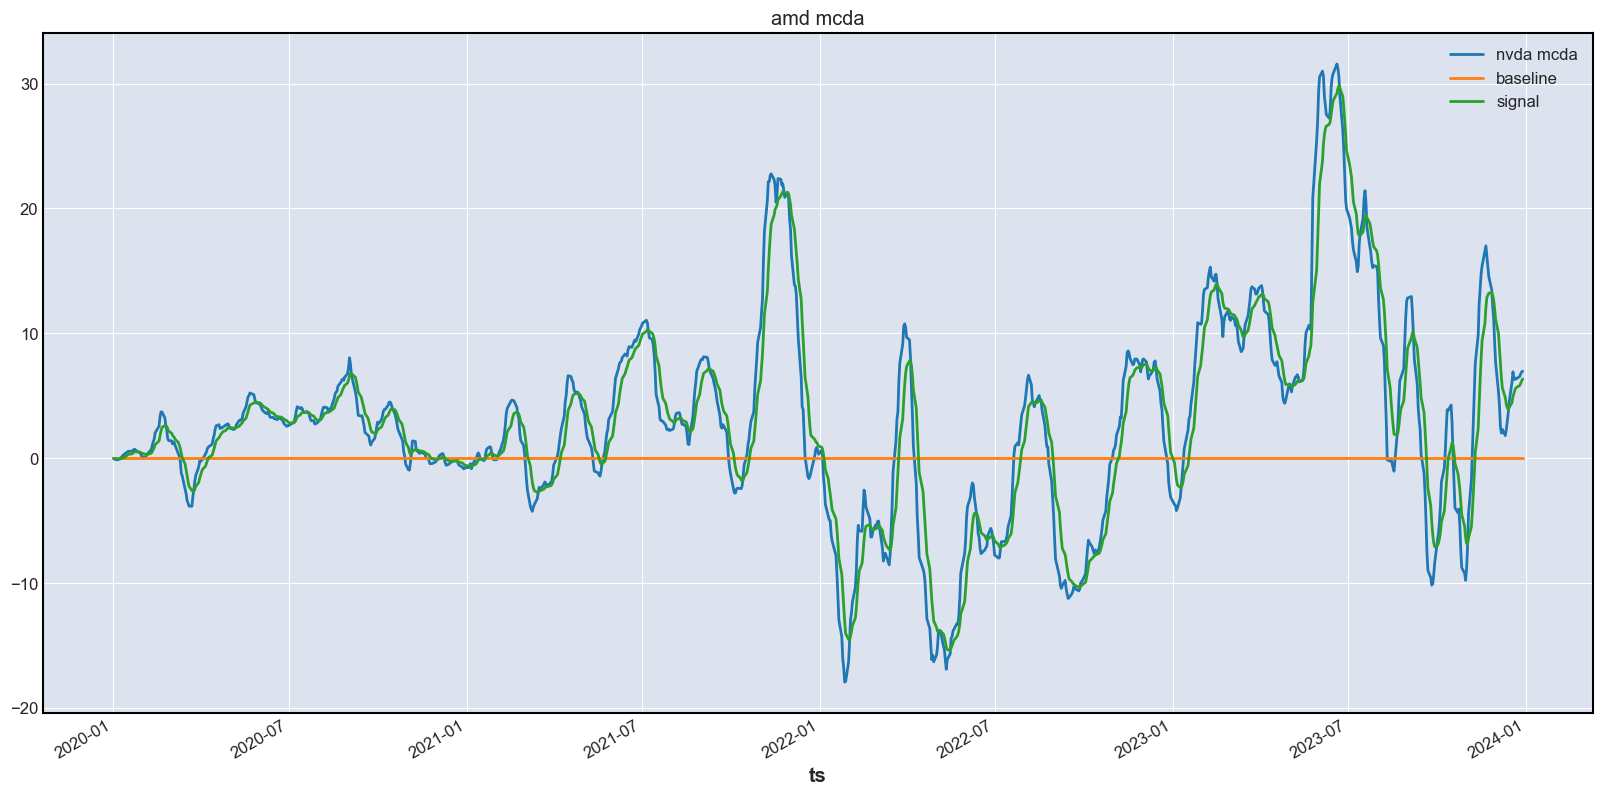

In [40]:
df_nvda["macd"] = df_nvda["adj_close"].ewm(span=12, adjust=False).mean()-df_nvda["adj_close"].ewm(span=26, adjust=False).mean()
df_nvda["baseline"] = 0
df_nvda["signal"] = df_nvda["macd"].ewm(span=9, adjust=False).mean()
df_nvda["macd"].plot(label="nvda mcda", figsize=(20,10))
df_nvda["baseline"].plot(label="baseline")
df_nvda["signal"].plot(label="signal")
plt.title("amd mcda")
plt.legend()

## Bollinger bands

In [41]:
window_in_days = 20
number_std = 2

In [42]:
df_amd.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='ts', length=1006, freq=None)

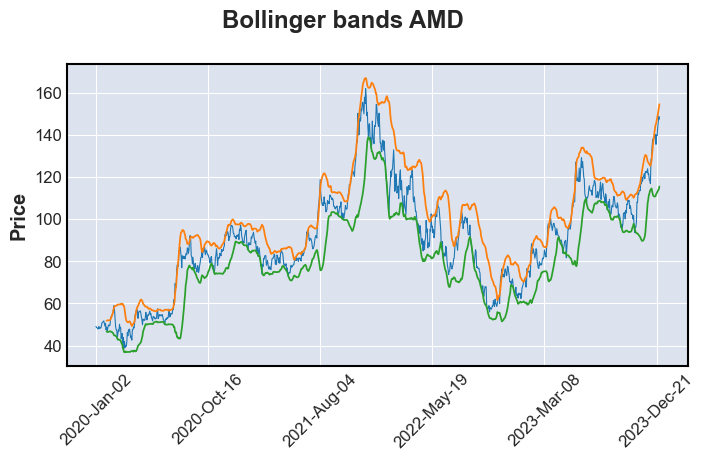

In [43]:
amd_rolling_mean = df_amd["adj_close"].rolling(window_in_days).mean()
amd_rolling_std = df_amd["adj_close"].rolling(window_in_days).std()
df_amd["rolling_mean"] = amd_rolling_mean
df_amd["bollinger_high"] = amd_rolling_mean + (amd_rolling_std * number_std)
df_amd["bollinger_low"] = amd_rolling_mean - (amd_rolling_std * number_std)
high_low = df_amd[["bollinger_high", "bollinger_low"]]
apd = mfp.make_addplot(high_low)
kwargs = dict(title="Bollinger bands AMD", figratio=(30,15), figscale=0.75)
mfp.plot(df_amd, addplot=apd, **kwargs, type="line")


## Parabolic Stop and Reverse (SAR)

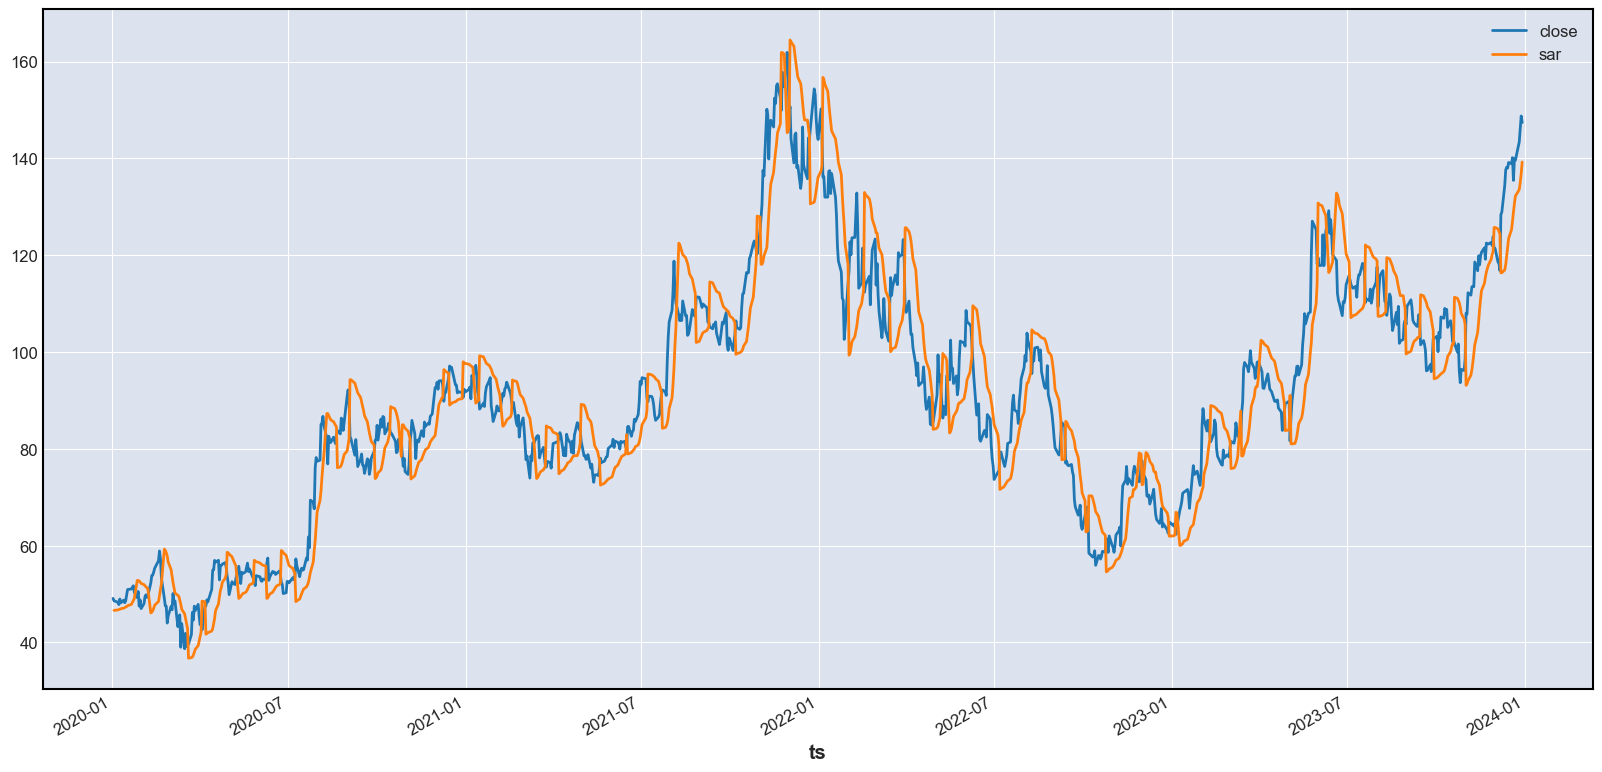

In [44]:
df_amd["sar"] = talib.SAR(df_amd["high"].values, df_amd["low"].values, acceleration=0.02, maximum=0.2)
df_amd["close"].plot(label="close", figsize=(20,10))
df_amd["sar"].plot(label="sar", figsize=(20,10))
plt.legend()

## stochastic oscillators

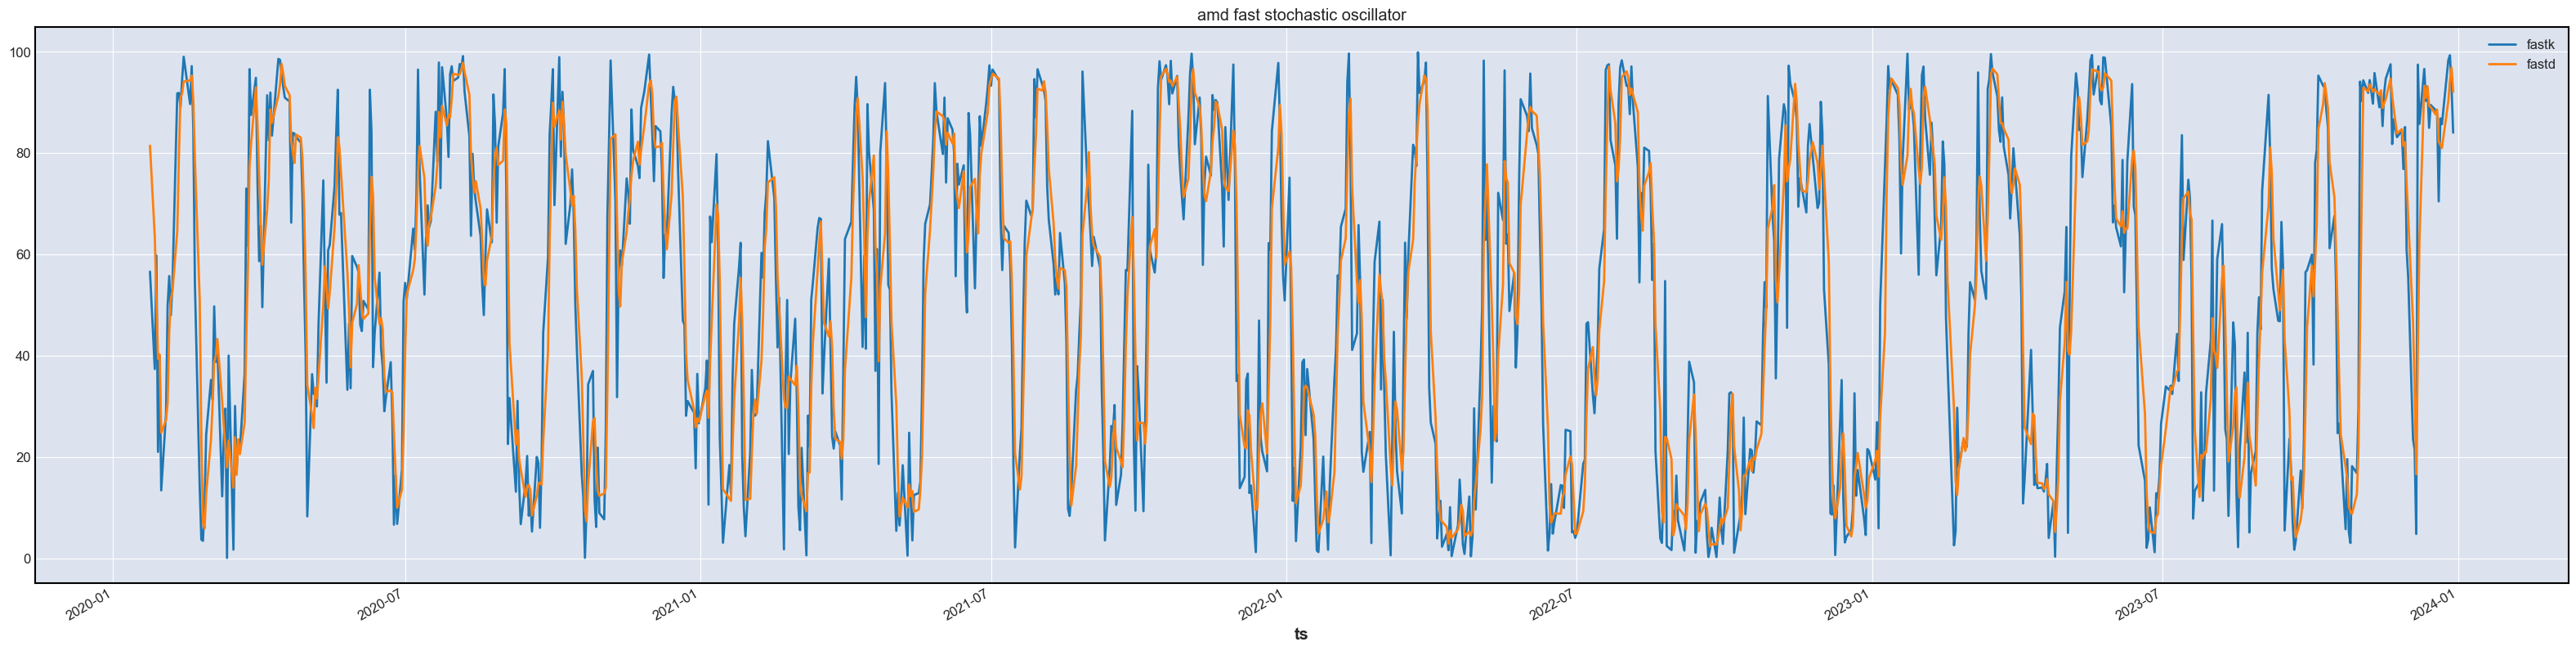

In [45]:
df_amd["fastk"], df_amd["fastd"] = talib.STOCHF(df_amd["high"].values, df_amd["low"].values, df_amd["close"].values, fastk_period=14, fastd_period=3)
df_amd["slowk"], df_amd["slowd"] = talib.STOCH(df_amd["high"].values, df_amd["low"].values, df_amd["close"].values, fastk_period=14, slowk_period=3, slowd_period=3)

df_amd["fastk"].plot(label="fastk", figsize=(40,10))
df_amd["fastd"].plot(label="fastd")
plt.title("amd fast stochastic oscillator")
plt.legend()

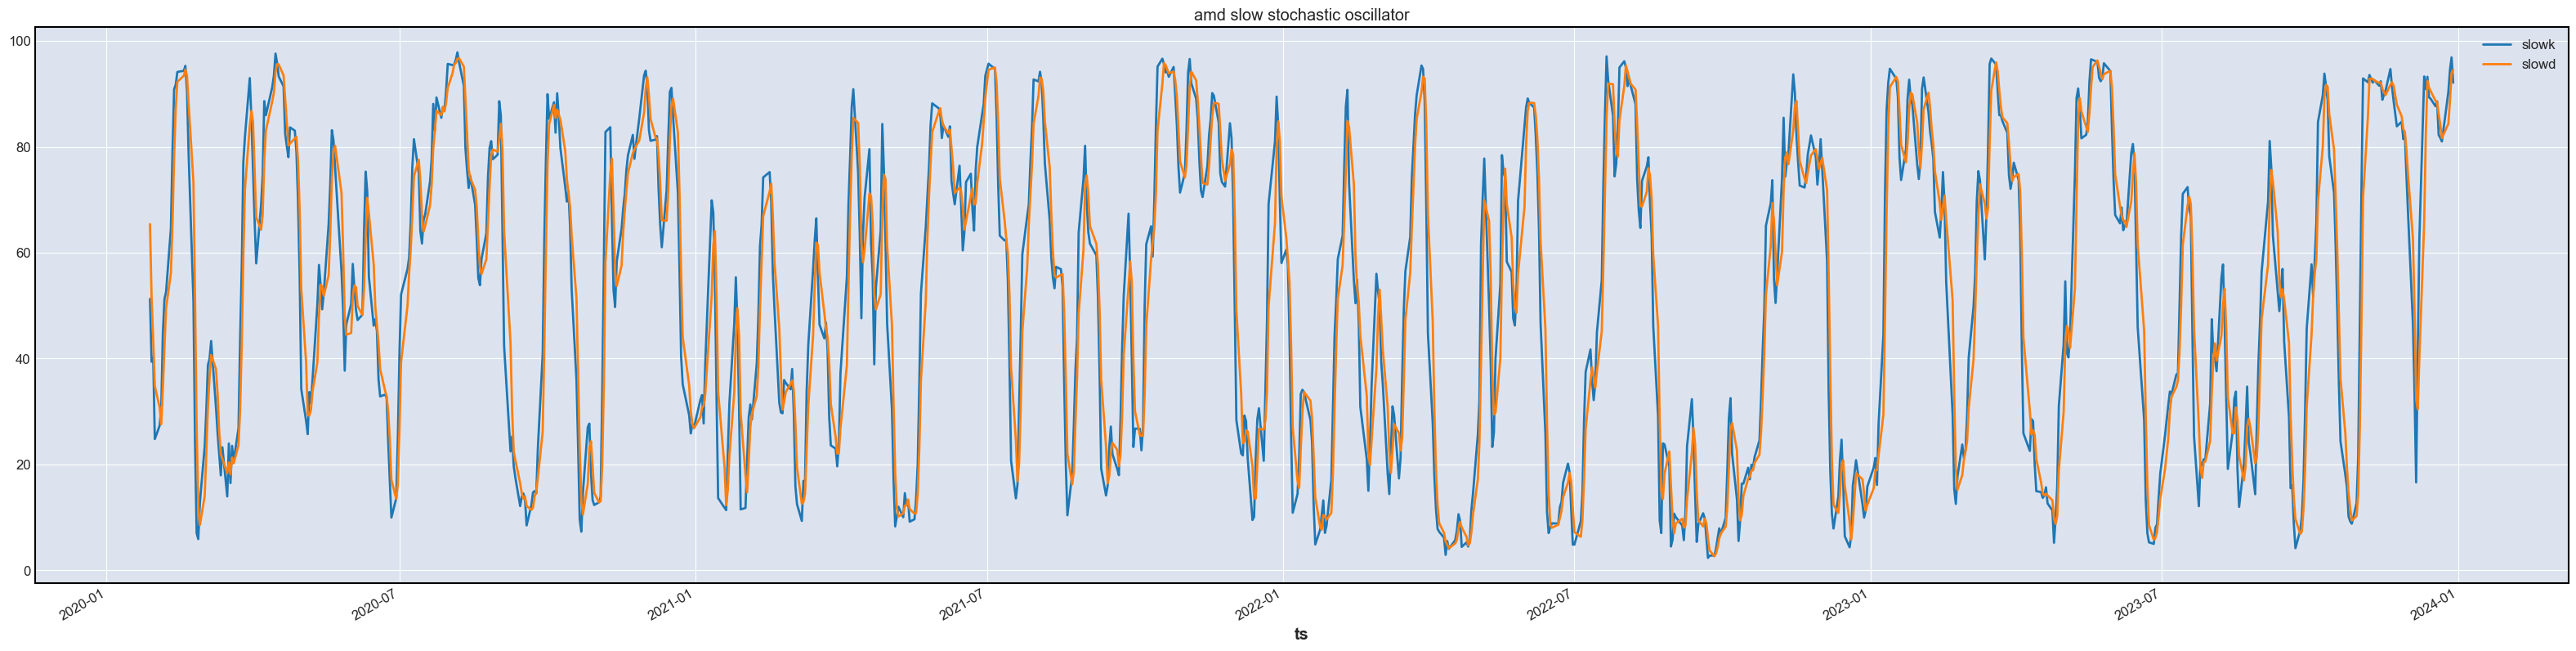

In [46]:
df_amd["slowk"].plot(label="slowk", figsize=(40,10))
df_amd["slowd"].plot(label="slowd")
plt.title("amd slow stochastic oscillator")
plt.legend()

# portfolio metrics

In [83]:
start = datetime(2018,1,1)
end = datetime.now()

tickers = ["AMD", "NVDA", "TYO", "MSFT"]
portfolio_weights = np.array([0.25, 0.25,0.25, 0.25])

stocks = pd.DataFrame()

for t in tickers:
    df = get_ticker(t, start=start, end=end)
    df['ts'] = pd.to_datetime(df['actual_time'],unit='s')
    df.set_index("ts", inplace=True)
    stocks[t] = df["adj_close"]

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AMD,NVDA,TYO,MSFT
ts,,,,
2024-01-12,146.559998,547.099976,13.26,388.470001
2024-01-16,158.740005,563.820007,13.56,390.269989
2024-01-17,160.169998,560.530029,13.75,389.470001
2024-01-18,162.669998,571.070007,13.82,393.869995
2024-01-19,174.229996,594.909973,13.83,398.670013


In [90]:
### ... to finish later
stocks_return = stocks/stocks.shift(1)
stocks_return

,AMD,NVDA,TYO,MSFT
ts,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,1.051913,1.065814,0.993653,1.004654
2018-01-04,1.049351,1.005271,1.005678,1.008801
2018-01-05,0.980198,1.008474,1.000706,1.012398
2018-01-08,1.033670,1.030641,1.004937,1.001020
...,...,...,...,...
2024-01-12,0.990136,0.997957,0.994003,1.009984
2024-01-16,1.083106,1.030561,1.022624,1.004634
2024-01-17,1.009008,0.994165,1.014012,0.997950


In [91]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights, axis=1)
weighted_returns_portfolio

,AMD,NVDA,TYO,MSFT
ts,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.262978,0.266453,0.248413,0.251163
2018-01-04,0.262338,0.251318,0.251419,0.252200
2018-01-05,0.245050,0.252119,0.250176,0.253100
2018-01-08,0.258418,0.257660,0.251234,0.250255
...,...,...,...,...
2024-01-12,0.247534,0.249489,0.248501,0.252496
2024-01-16,0.270776,0.257640,0.255656,0.251158
2024-01-17,0.252252,0.248541,0.253503,0.249488


In [93]:
portfolio_return = weighted_returns_portfolio.sum(axis=1).dropna()
portfolio_return

ts
2018-01-02    0.000000
2018-01-03    1.029008
2018-01-04    1.017275
2018-01-05    1.000444
2018-01-08    1.017567
                ...   
2024-01-12    0.998020
2024-01-16    1.035231
2024-01-17    1.003784
2024-01-18    1.012700
2024-01-19    1.031430
Length: 1522, dtype: float64

In [94]:
stocks_covariance = stocks_return.cov()
stocks_covariance

,AMD,NVDA,TYO,MSFT
AMD,0.001215,0.000805,0.000027,0.000378
NVDA,0.000805,0.001044,0.000031,0.000425
TYO,0.000027,0.000031,0.000187,0.000024
MSFT,0.000378,0.000425,0.000024,0.000358


In [95]:
annualized_covariance = stocks_covariance * MARKET_DAYS_IN_YEAR
annualized_covariance

,AMD,NVDA,TYO,MSFT
AMD,0.306296,0.202806,0.006871,0.095265
NVDA,0.202806,0.263102,0.007801,0.107054
TYO,0.006871,0.007801,0.047211,0.005948
MSFT,0.095265,0.107054,0.005948,0.090176


In [96]:
portfolio_sd = np.sqrt(np.dot(portfolio_weights.T, np.dot(annualized_covariance, portfolio_weights)))
portfolio_sd

0.3120773890593409

## CAPM / Beta

In [123]:
tickers = ["AMD", "^GSPC"]
stocks = pd.DataFrame()

for t in tickers:
    df = get_ticker(t, start=start, end=end)
    df['ts'] = pd.to_datetime(df['actual_time'],unit='s')
    df.set_index("ts", inplace=True)
    stocks[t] = df["adj_close"]

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AMD,^GSPC
ts,,
2024-01-12,146.559998,4783.830078
2024-01-16,158.740005,4765.979980
2024-01-17,160.169998,4739.209961
2024-01-18,162.669998,4780.939941
2024-01-19,174.229996,4839.810059


In [124]:
stocks_return = np.log(stocks/stocks.shift(1))
stocks_return

,AMD,^GSPC
ts,,
2018-01-02,NaN,NaN
2018-01-03,0.050610,0.006378
2018-01-04,0.048172,0.004021
2018-01-05,-0.020001,0.007009
2018-01-08,0.033116,0.001661
...,...,...
2024-01-12,-0.009913,0.000751
2024-01-16,0.079833,-0.003738
2024-01-17,0.008968,-0.005633


In [125]:
covariance = stocks_return.cov() * MARKET_DAYS_IN_YEAR
covariance

,AMD,^GSPC
AMD,0.303141,0.068995
^GSPC,0.068995,0.042811


In [126]:
covariance_market = covariance.iloc[0,1]
covariance_market

0.06899497629986187

In [127]:
market_variance = stocks_return["^GSPC"].var() * MARKET_DAYS_IN_YEAR
market_variance

0.04281080278342093

### beta

In [129]:
# βi = 1            The asset is exactly as volatile as the market it is compared with
# βi > 1            The asset is more volatile than the market it is compared with
# βi < 1 > 0        The asset is less volatile than the market it is compared with
# βi = 0            The asset is not correlated with the market it is compared with
# βi < 0            Negatively correlated with the market it is compared with

beta = covariance_market/market_variance
beta

1.6116253799048386

### capm

In [212]:
tickers = ["DIS", "TSLA", "TYO", "MSFT"]
stocks = pd.DataFrame()

for t in tickers:
    df = get_ticker(t, start=start, end=end)
    df['ts'] = pd.to_datetime(df['actual_time'],unit='s')
    df.set_index("ts", inplace=True)
    stocks[t] = df["adj_close"]

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,DIS,TSLA,TYO,MSFT
ts,,,,
2024-01-12,90.349998,218.889999,13.26,388.470001
2024-01-16,93.050003,219.910004,13.56,390.269989
2024-01-17,90.339996,215.550003,13.75,389.470001
2024-01-18,92.209999,211.880005,13.82,393.869995
2024-01-19,93.059998,212.190002,13.83,398.670013


In [213]:
portfolio_weights = np.array([0.3, 0.3, 0.2, 0.2])
stocks_return = np.log(stocks/stocks.shift(1))
stocks_return

,DIS,TSLA,TYO,MSFT
ts,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.004284,-0.010286,-0.006367,0.004643
2018-01-04,-0.000445,-0.008325,0.005662,0.008763
2018-01-05,-0.005450,0.006210,0.000706,0.012322
2018-01-08,-0.014438,0.060755,0.004924,0.001020
...,...,...,...,...
2024-01-12,0.010011,-0.037349,-0.006015,0.009934
2024-01-16,0.029446,0.004649,0.022372,0.004623
2024-01-17,-0.029557,-0.020025,0.013915,-0.002052


In [214]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights, axis=1)
weighted_returns_portfolio

,DIS,TSLA,TYO,MSFT
ts,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.001285,-0.003086,-0.001273,0.000929
2018-01-04,-0.000134,-0.002497,0.001132,0.001753
2018-01-05,-0.001635,0.001863,0.000141,0.002464
2018-01-08,-0.004331,0.018226,0.000985,0.000204
...,...,...,...,...
2024-01-12,0.003003,-0.011205,-0.001203,0.001987
2024-01-16,0.008834,0.001395,0.004474,0.000925
2024-01-17,-0.008867,-0.006008,0.002783,-0.000410


In [215]:
stocks_return["portfolio"] = weighted_returns_portfolio.sum(axis=1)
stocks_return

,DIS,TSLA,TYO,MSFT,portfolio
ts,,,,,
2018-01-02,NaN,NaN,NaN,NaN,0.000000
2018-01-03,0.004284,-0.010286,-0.006367,0.004643,-0.002145
2018-01-04,-0.000445,-0.008325,0.005662,0.008763,0.000254
2018-01-05,-0.005450,0.006210,0.000706,0.012322,0.002834
2018-01-08,-0.014438,0.060755,0.004924,0.001020,0.015084
...,...,...,...,...,...
2024-01-12,0.010011,-0.037349,-0.006015,0.009934,-0.007418
2024-01-16,0.029446,0.004649,0.022372,0.004623,0.015628
2024-01-17,-0.029557,-0.020025,0.013915,-0.002052,-0.012502


In [216]:
cumulative_returns_portfolio = ((1+stocks_return["portfolio"]).cumprod()-1)
cumulative_returns_portfolio

ts
2018-01-02    0.000000
2018-01-03   -0.002145
2018-01-04   -0.001892
2018-01-05    0.000936
2018-01-08    0.016034
                ...   
2024-01-12    1.041200
2024-01-16    1.073099
2024-01-17    1.047181
2024-01-18    1.055896
2024-01-19    1.067735
Name: portfolio, Length: 1522, dtype: float64

Text(0, 0.5, 'cumulative return')

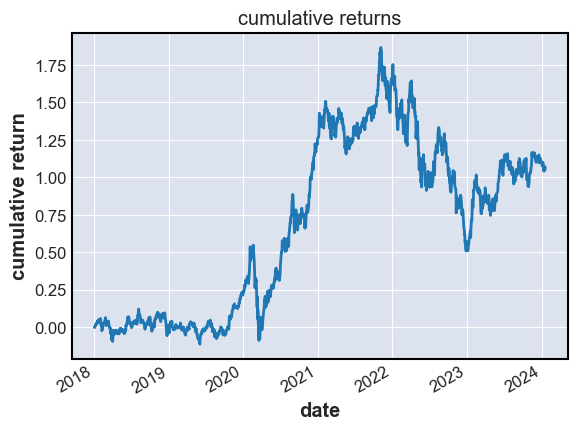

In [217]:
cumulative_returns_portfolio.plot(label="portfolio cumulative returns", title="cumulative returns")
plt.xlabel("date")
plt.ylabel("cumulative return")


In [218]:
inflation_usa = fred.get_series("USACPALTT01CTGYM").sort_index(ascending=False).iloc[0]
inflation_usa

3.26293749456363

In [219]:
t10_bill_yield = fred.get_series("DGS10").sort_index(ascending=False).iloc[0]
t10_bill_yield

4.14

In [220]:
risk_free_rate = (t10_bill_yield - inflation_usa)/100
risk_free_rate

0.008770625054363696

In [221]:
stocks_return["rf rate"] = risk_free_rate
stocks_return

,DIS,TSLA,TYO,MSFT,portfolio,rf rate
ts,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,0.000000,0.008771
2018-01-03,0.004284,-0.010286,-0.006367,0.004643,-0.002145,0.008771
2018-01-04,-0.000445,-0.008325,0.005662,0.008763,0.000254,0.008771
2018-01-05,-0.005450,0.006210,0.000706,0.012322,0.002834,0.008771
2018-01-08,-0.014438,0.060755,0.004924,0.001020,0.015084,0.008771
...,...,...,...,...,...,...
2024-01-12,0.010011,-0.037349,-0.006015,0.009934,-0.007418,0.008771
2024-01-16,0.029446,0.004649,0.022372,0.004623,0.015628,0.008771
2024-01-17,-0.029557,-0.020025,0.013915,-0.002052,-0.012502,0.008771


In [222]:
stocks_return["excess"] = stocks_return["portfolio"] - stocks_return["rf rate"]
stocks_return

,DIS,TSLA,TYO,MSFT,portfolio,rf rate,excess
ts,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,0.000000,0.008771,-0.008771
2018-01-03,0.004284,-0.010286,-0.006367,0.004643,-0.002145,0.008771,-0.010916
2018-01-04,-0.000445,-0.008325,0.005662,0.008763,0.000254,0.008771,-0.008517
2018-01-05,-0.005450,0.006210,0.000706,0.012322,0.002834,0.008771,-0.005937
2018-01-08,-0.014438,0.060755,0.004924,0.001020,0.015084,0.008771,0.006313
...,...,...,...,...,...,...,...
2024-01-12,0.010011,-0.037349,-0.006015,0.009934,-0.007418,0.008771,-0.016188
2024-01-16,0.029446,0.004649,0.022372,0.004623,0.015628,0.008771,0.006857
2024-01-17,-0.029557,-0.020025,0.013915,-0.002052,-0.012502,0.008771,-0.021273


In [223]:
t = "SPY"
df = get_ticker(t, start=start, end=end)
df['ts'] = pd.to_datetime(df['actual_time'],unit='s')
df.set_index("ts", inplace=True)
stocks_return["market"] = df["adj_close"]
stocks_return

[*********************100%%**********************]  1 of 1 completed


,DIS,TSLA,TYO,MSFT,portfolio,rf rate,excess,market
ts,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,0.000000,0.008771,-0.008771,243.072266
2018-01-03,0.004284,-0.010286,-0.006367,0.004643,-0.002145,0.008771,-0.010916,244.609772
2018-01-04,-0.000445,-0.008325,0.005662,0.008763,0.000254,0.008771,-0.008517,245.640747
2018-01-05,-0.005450,0.006210,0.000706,0.012322,0.002834,0.008771,-0.005937,247.277740
2018-01-08,-0.014438,0.060755,0.004924,0.001020,0.015084,0.008771,0.006313,247.729843
...,...,...,...,...,...,...,...,...
2024-01-12,0.010011,-0.037349,-0.006015,0.009934,-0.007418,0.008771,-0.016188,476.679993
2024-01-16,0.029446,0.004649,0.022372,0.004623,0.015628,0.008771,0.006857,474.929993
2024-01-17,-0.029557,-0.020025,0.013915,-0.002052,-0.012502,0.008771,-0.021273,472.290009


In [224]:
stocks_return["market"] = np.log(stocks_return["market"]/stocks_return["market"].shift(1))
stocks_return

,DIS,TSLA,TYO,MSFT,portfolio,rf rate,excess,market
ts,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,0.000000,0.008771,-0.008771,NaN
2018-01-03,0.004284,-0.010286,-0.006367,0.004643,-0.002145,0.008771,-0.010916,0.006305
2018-01-04,-0.000445,-0.008325,0.005662,0.008763,0.000254,0.008771,-0.008517,0.004206
2018-01-05,-0.005450,0.006210,0.000706,0.012322,0.002834,0.008771,-0.005937,0.006642
2018-01-08,-0.014438,0.060755,0.004924,0.001020,0.015084,0.008771,0.006313,0.001827
...,...,...,...,...,...,...,...,...
2024-01-12,0.010011,-0.037349,-0.006015,0.009934,-0.007418,0.008771,-0.016188,0.000692
2024-01-16,0.029446,0.004649,0.022372,0.004623,0.015628,0.008771,0.006857,-0.003678
2024-01-17,-0.029557,-0.020025,0.013915,-0.002052,-0.012502,0.008771,-0.021273,-0.005574


In [225]:
stocks_return["excess_market"] = stocks_return["market"] - stocks_return["rf rate"]
stocks_return

,DIS,TSLA,TYO,MSFT,portfolio,rf rate,excess,market,excess_market
ts,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,0.000000,0.008771,-0.008771,NaN,NaN
2018-01-03,0.004284,-0.010286,-0.006367,0.004643,-0.002145,0.008771,-0.010916,0.006305,-0.002465
2018-01-04,-0.000445,-0.008325,0.005662,0.008763,0.000254,0.008771,-0.008517,0.004206,-0.004565
2018-01-05,-0.005450,0.006210,0.000706,0.012322,0.002834,0.008771,-0.005937,0.006642,-0.002129
2018-01-08,-0.014438,0.060755,0.004924,0.001020,0.015084,0.008771,0.006313,0.001827,-0.006944
...,...,...,...,...,...,...,...,...,...
2024-01-12,0.010011,-0.037349,-0.006015,0.009934,-0.007418,0.008771,-0.016188,0.000692,-0.008078
2024-01-16,0.029446,0.004649,0.022372,0.004623,0.015628,0.008771,0.006857,-0.003678,-0.012449
2024-01-17,-0.029557,-0.020025,0.013915,-0.002052,-0.012502,0.008771,-0.021273,-0.005574,-0.014345


In [226]:
covariance_matrix = stocks_return[["excess", "excess_market"]].cov()
covariance_matrix

,excess,excess_market
excess,0.000319,0.000173
excess_market,0.000173,0.000165


In [227]:
covariance_coefficient = covariance_matrix.iloc[0,1]
covariance_coefficient

0.00017344340222307756

In [228]:
variance_coefficient = stocks_return["excess_market"].var()
variance_coefficient

0.00016524349970461553

In [229]:
beta = covariance_coefficient/variance_coefficient
beta

1.049623147253114

## sharpe ratio